In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("DSRoles_US_2023_FEWER_JOB_TITLES_FEWER_PAYRANGES.csv")
df.head()

,experience_level_code,job category code,salary_in_usd_code,remote_ratio,company_size_code
0,1,1,1,0,2
1,1,1,1,0,2
2,3,1,1,100,2
3,2,1,1,100,2
4,3,1,1,0,2


In [3]:
# Define features set
X = df.copy()
X.drop("salary_in_usd_code", axis=1, inplace=True)
X.head()

,experience_level_code,job category code,remote_ratio,company_size_code
0,1,1,0,2
1,1,1,0,2
2,3,1,100,2
3,2,1,100,2
4,3,1,0,2


In [4]:
# Define target vector
y = df["salary_in_usd_code"].ravel()
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [8]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [9]:
# Making Predictions Using the Random Forest Model
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [10]:
# Model Evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual $100K & Under", "Actual $200K & Under","Actual $300K & Under", "Over $300K"], 
    columns=["Predicted $100K & Under", "Predicted $200K & Under" , "Predicted $300K & Under","Predicted Over $300K"]
)

In [11]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted $100K & Under,Predicted $200K & Under,Predicted $300K & Under,Predicted Over $300K
Actual $100K & Under,11,43,0,0
Actual $200K & Under,7,206,3,0
Actual $300K & Under,0,48,5,0
Over $300K,0,3,1,0


Accuracy Score : 0.6788990825688074
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.20      0.31        54
           3       0.69      0.95      0.80       216
           5       0.56      0.09      0.16        53
           7       0.00      0.00      0.00         4

    accuracy                           0.68       327
   macro avg       0.46      0.31      0.32       327
weighted avg       0.64      0.68      0.60       327



C:\Users\Aaron\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aaron\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aaron\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [13]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.43012969932337913, 'experience_level_code'),
 (0.40283989122180835, 'job category code'),
 (0.13696499222687372, 'remote_ratio'),
 (0.030065417227938807, 'company_size_code')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

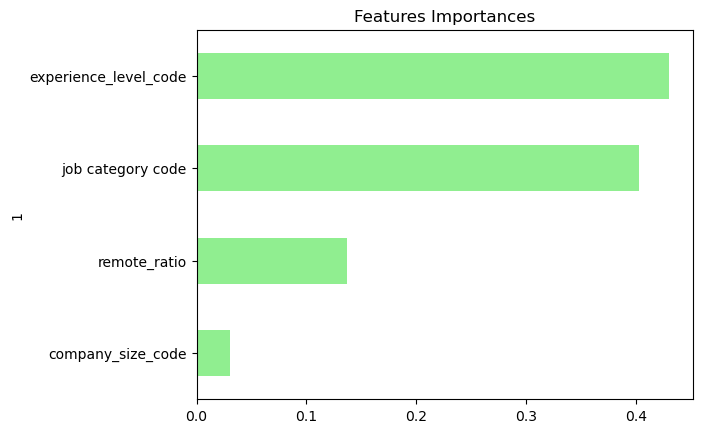

In [14]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)